# Exploratory Data Analysis - Retail Super Store


## 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os

## 2.Reading Dataset

In [2]:
d=pd.read_csv("SampleSuperstore.csv")
df=pd.DataFrame(d)
print ("Data has been successfully imported")
df.head()

Data has been successfully imported


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 3.Pre Processing of data and Exploratory data analysis

In [3]:
df.shape

(9994, 13)

### a. Peek at the data

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### b. Columns in the data

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### c. Categories types in data

In [6]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### d. Types of Sub-Category

In [7]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

### e. Types of Segments

In [8]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

### f. Drop postal Code

In [9]:
df = df.drop(["Postal Code"], axis=1)

### g. Number of products in each category

In [10]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [11]:
df["Category"].value_counts().sum()

9994

### h. Number of products in each sub-Category

In [12]:
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### i. Types of Region, Shipmodes,and Unique States


In [13]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [14]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [15]:
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

### j. Number of unique values in each columns

In [16]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### k. Summary of data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


###  l.Statiscal summary of data

In [18]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Min Sales: 0.444, Max Sales: 22638.48, Max Profit: 8399.976

In [19]:
#Total Sales:
print("Total sales are {}".format(df["Sales"].sum()))

#Total Profit:
print("Total profit is {}".format(df["Profit"].sum()))

Total sales are 2297200.8603000003
Total profit is 286397.0217


### m. Total number of null values in data

In [20]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### n. Number of duplicate values in data

In [21]:
df.duplicated().sum()

50

### p. Dropping duplicate values

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

### q. Correlation among the columns

In [24]:
df.corr()

C:\Users\megha\AppData\Local\Temp\ipykernel_14248\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


## 4. Visualization of data

### a. Bar plot between Sub-Category VS Category

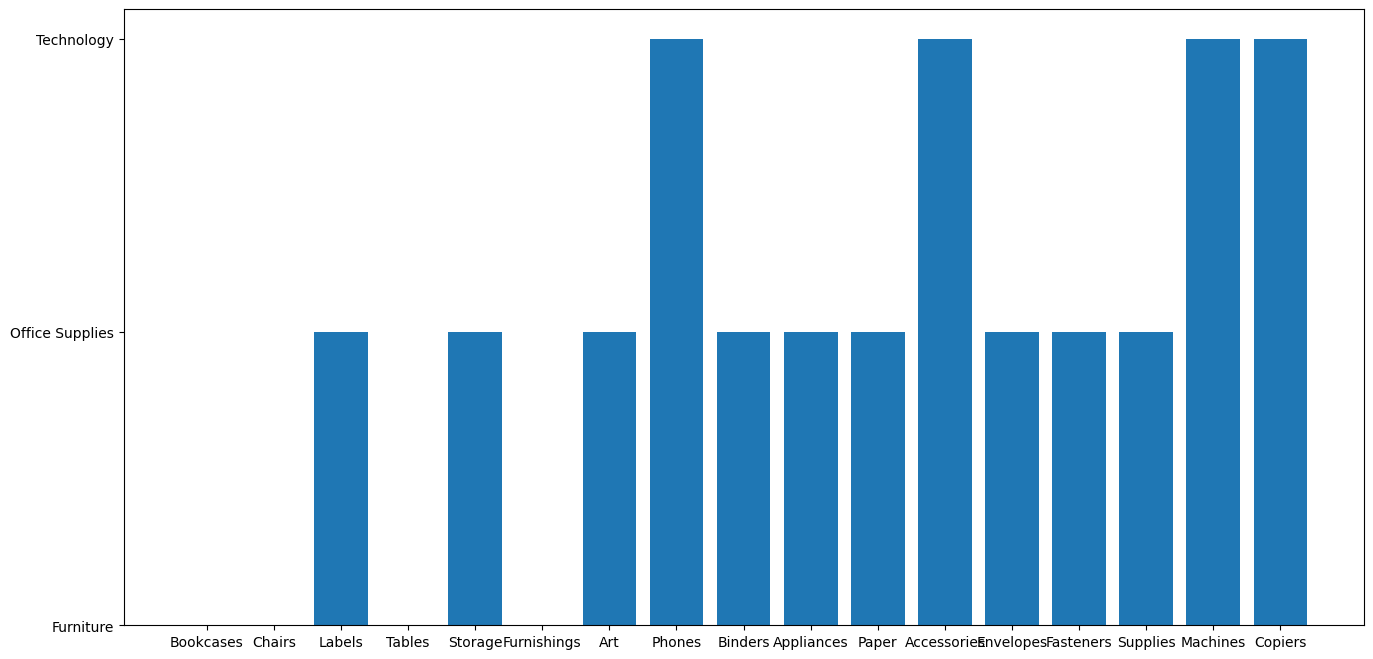

In [25]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category' , 'Category' , data = df)
plt.show()

### b. Pie Plot of Sub-Category

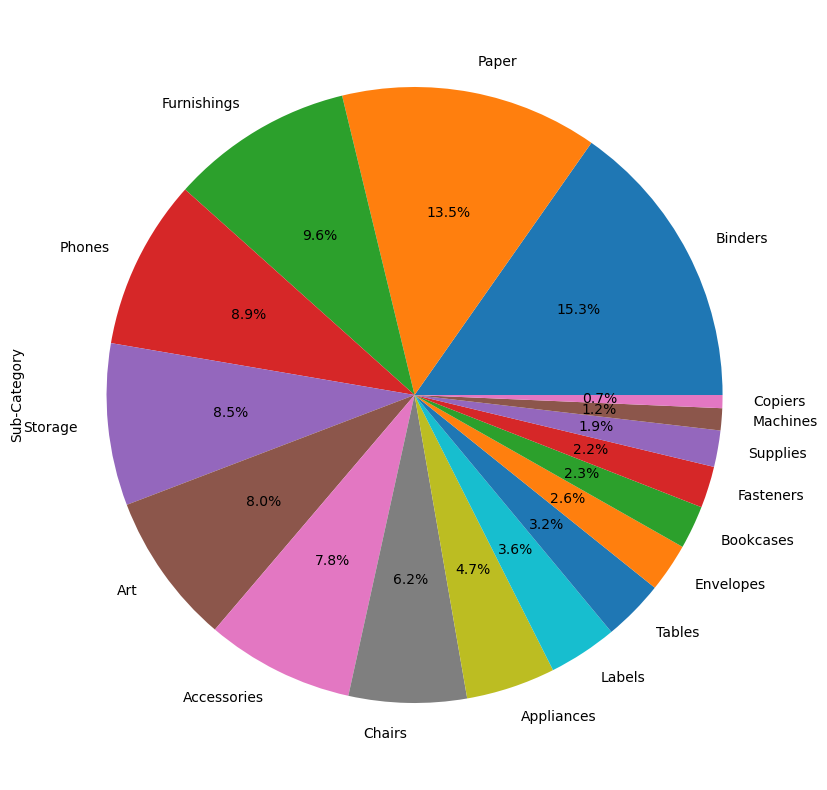

In [26]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

1. Major distribution of business is in Binders, Paper and Furnishings
2. Least distribution of business is in Copiers, Machines and Supplies

### c. Bar plot of Sales VS Profit

C:\Users\megha\AppData\Local\Temp\ipykernel_14248\1501966851.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


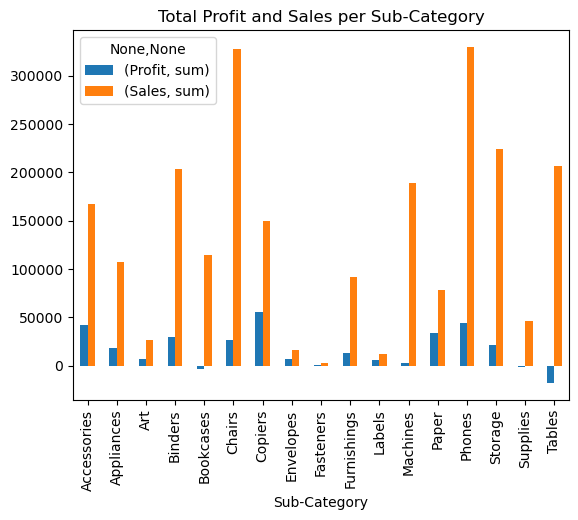

In [27]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

### d. Count Plot of Cities

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

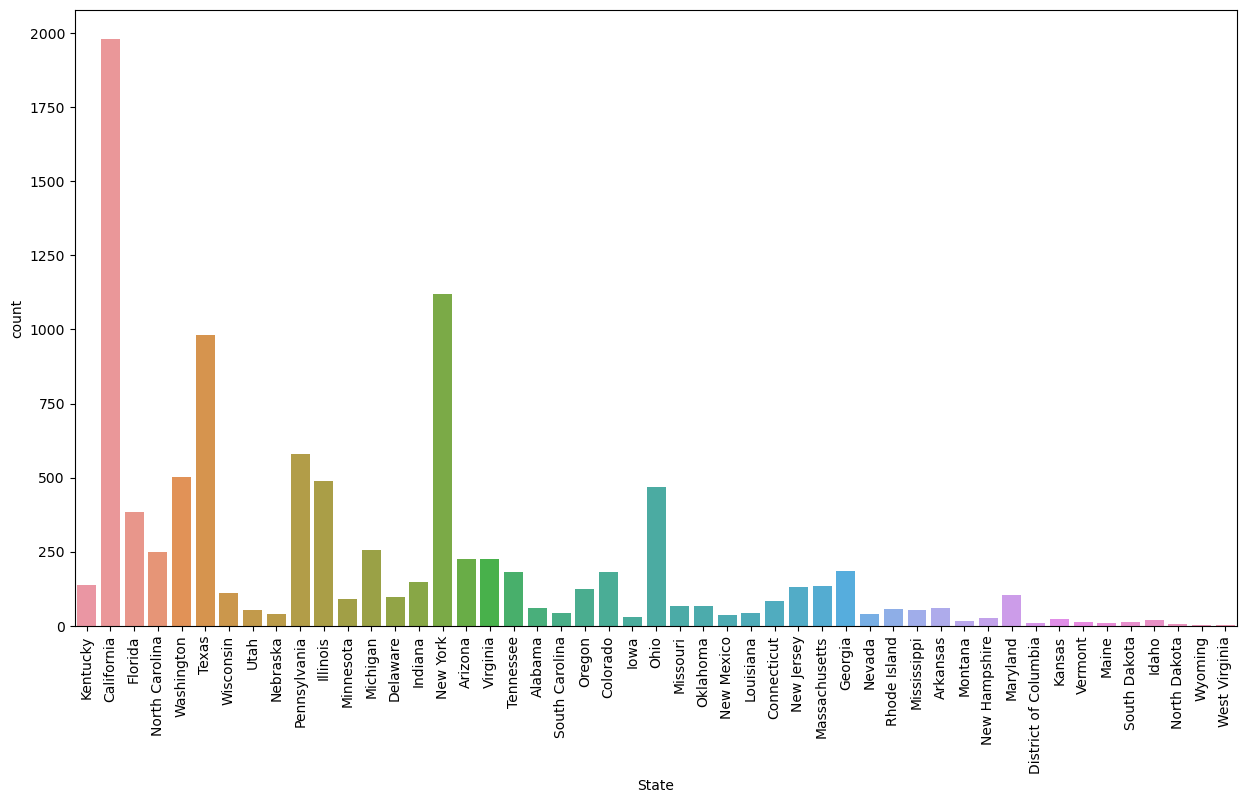

In [28]:
print(df['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

1. Most buyers belong to "California", "New York" and "Texas"
2. Least buyers belong to "Wyoming", "West Virginia" and "North Dakota"

In [29]:
ss=df.groupby(["State"]).Sales.sum()
sp=df.groupby(["State"]).Profit.sum()

Text(0, 0.5, 'Profit')

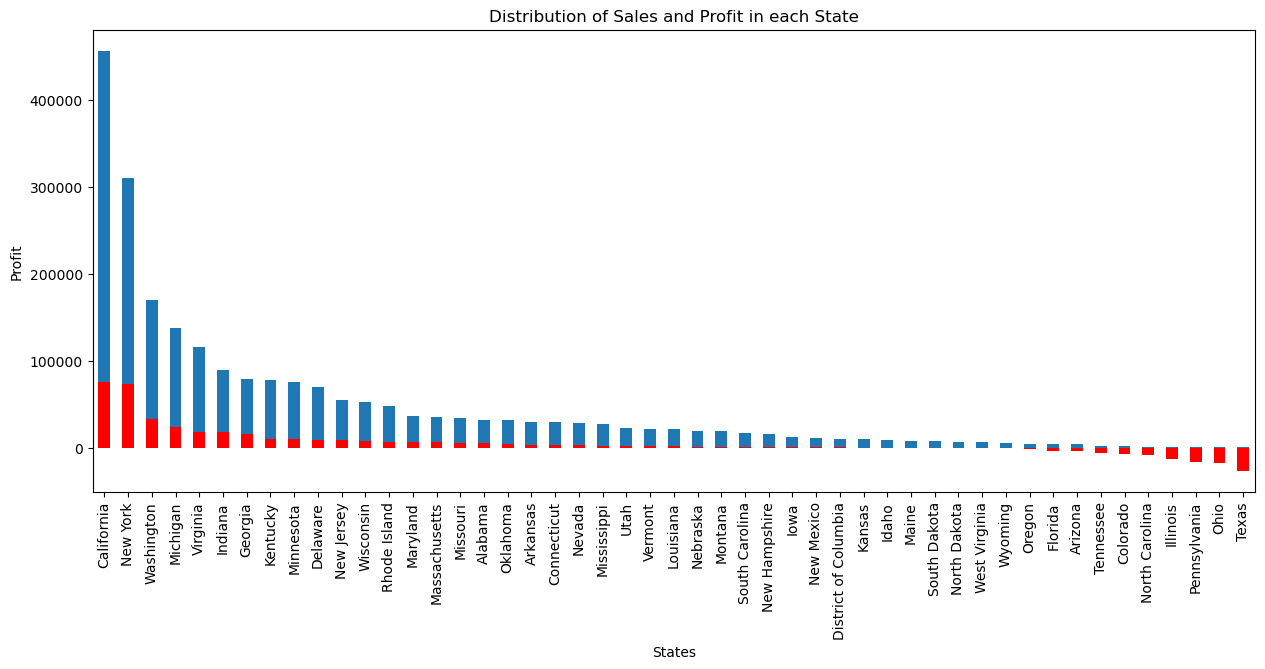

In [30]:
#State wise Distribution of Sales
ss.sort_values(ascending=False).plot(kind="bar",figsize=(15,6))
plt.xlabel("States")
plt.ylabel("Sales")

#State wise Distribution of Profit
sp.sort_values(ascending=False).sort_values(ascending=False).plot(kind="bar",figsize=(15,6),color="red")
plt.title("Distribution of Sales and Profit in each State")
plt.xlabel("States")
plt.ylabel("Profit")

1. Maximum Sales and Profit in cities: "California" and "New York" 
2. Minimum Sales and Profit in cities: "Oregon", "Florida" , "Arizona", "Tennessee", "Colorado",       "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas" 

### e. Sales and Profit Region wise

C:\Users\megha\AppData\Local\Temp\ipykernel_14248\3551602974.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()


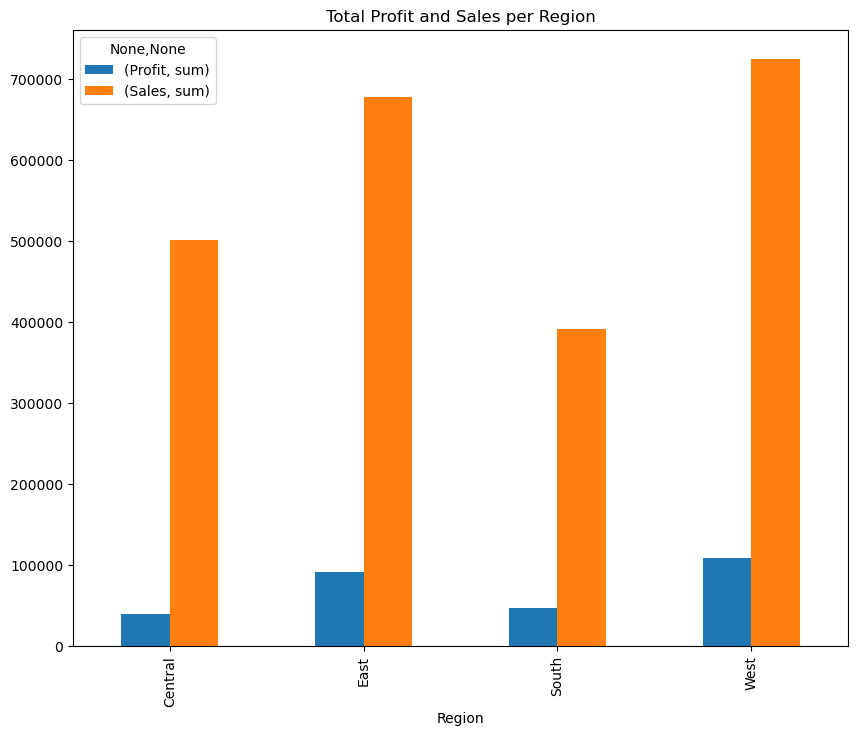

In [31]:
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title("Total Profit and Sales per Region")
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

### f. Line Plot of Discount VS Profit

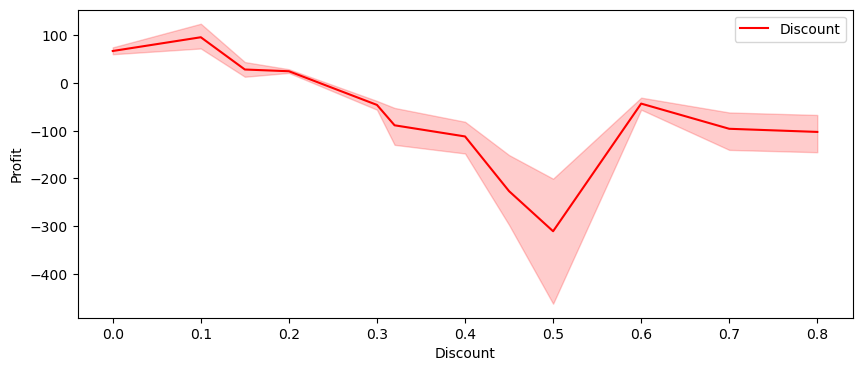

In [32]:
plt.figure(figsize = (10,4))
sns.lineplot(x='Discount', y='Profit', data = df, color = 'r' , label = 'Discount')
plt.legend()

Profit and Discount have negative relation,i.e, when one increases the other decreases

### g. Histogram of data

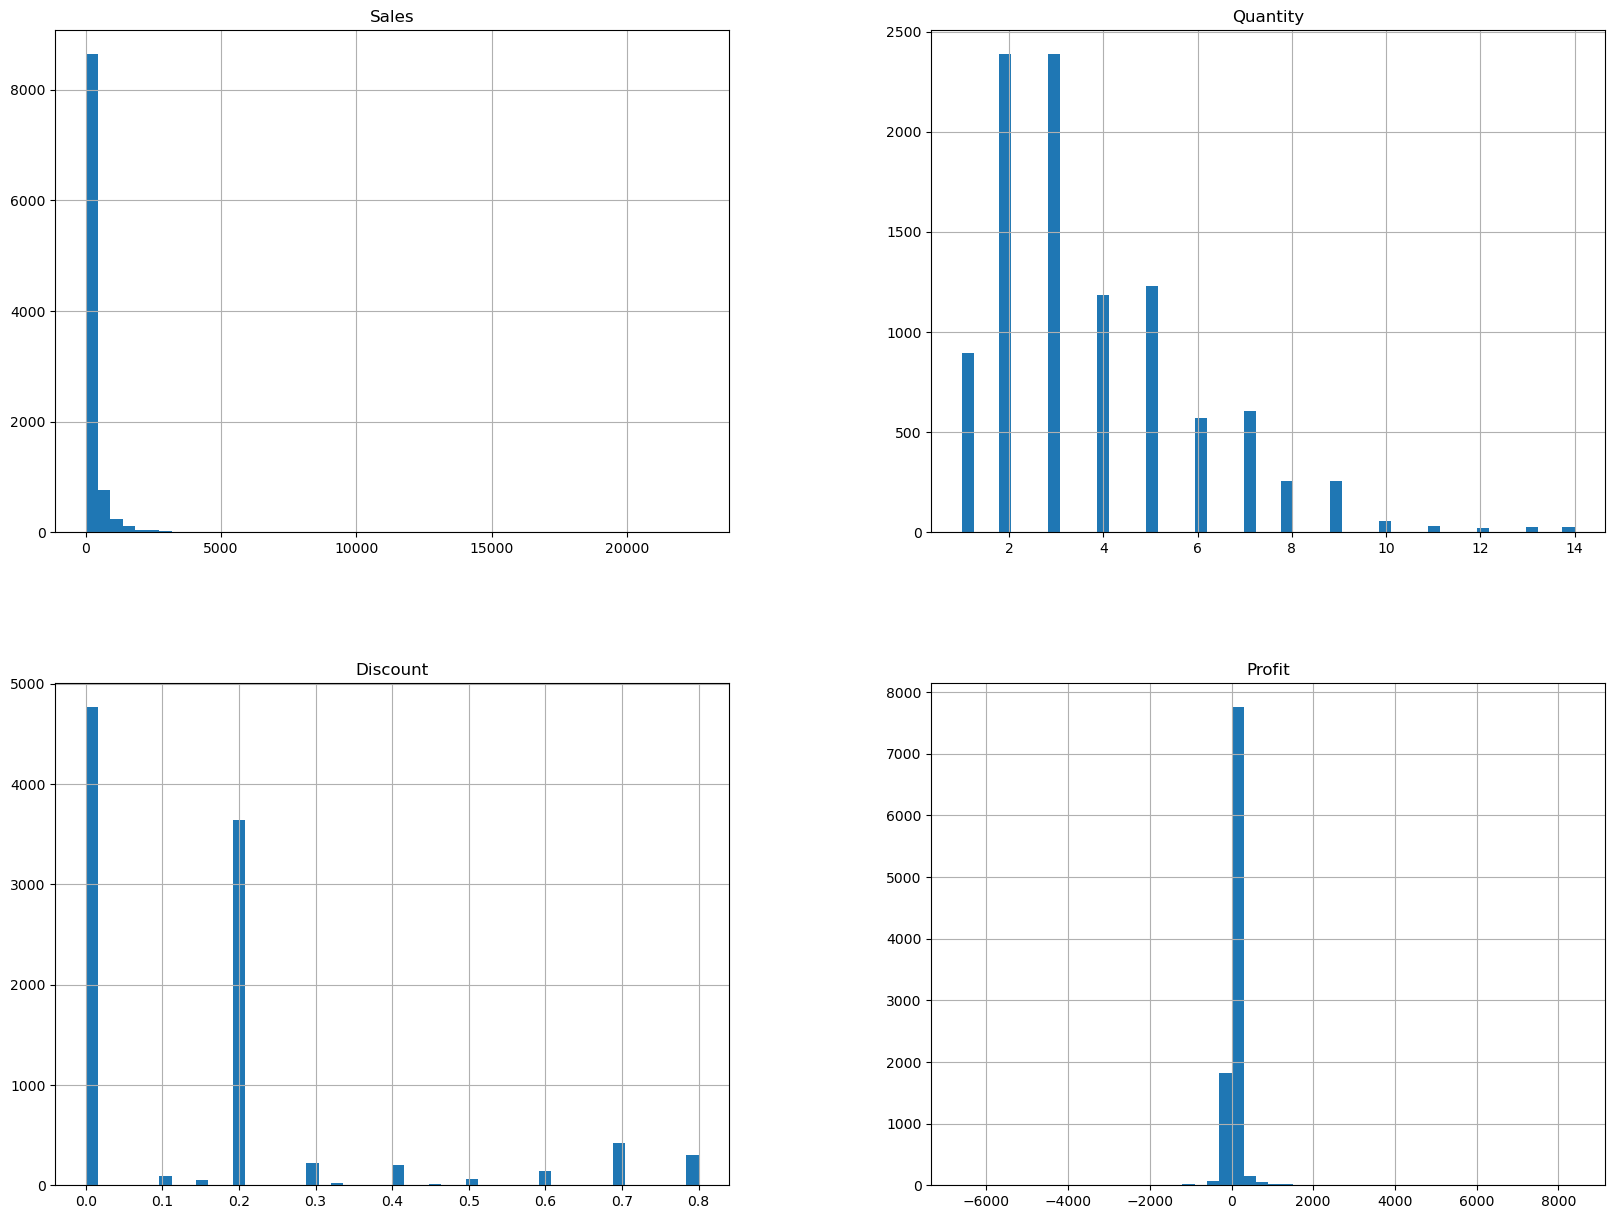

In [33]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### h. Pair plot of sub_category

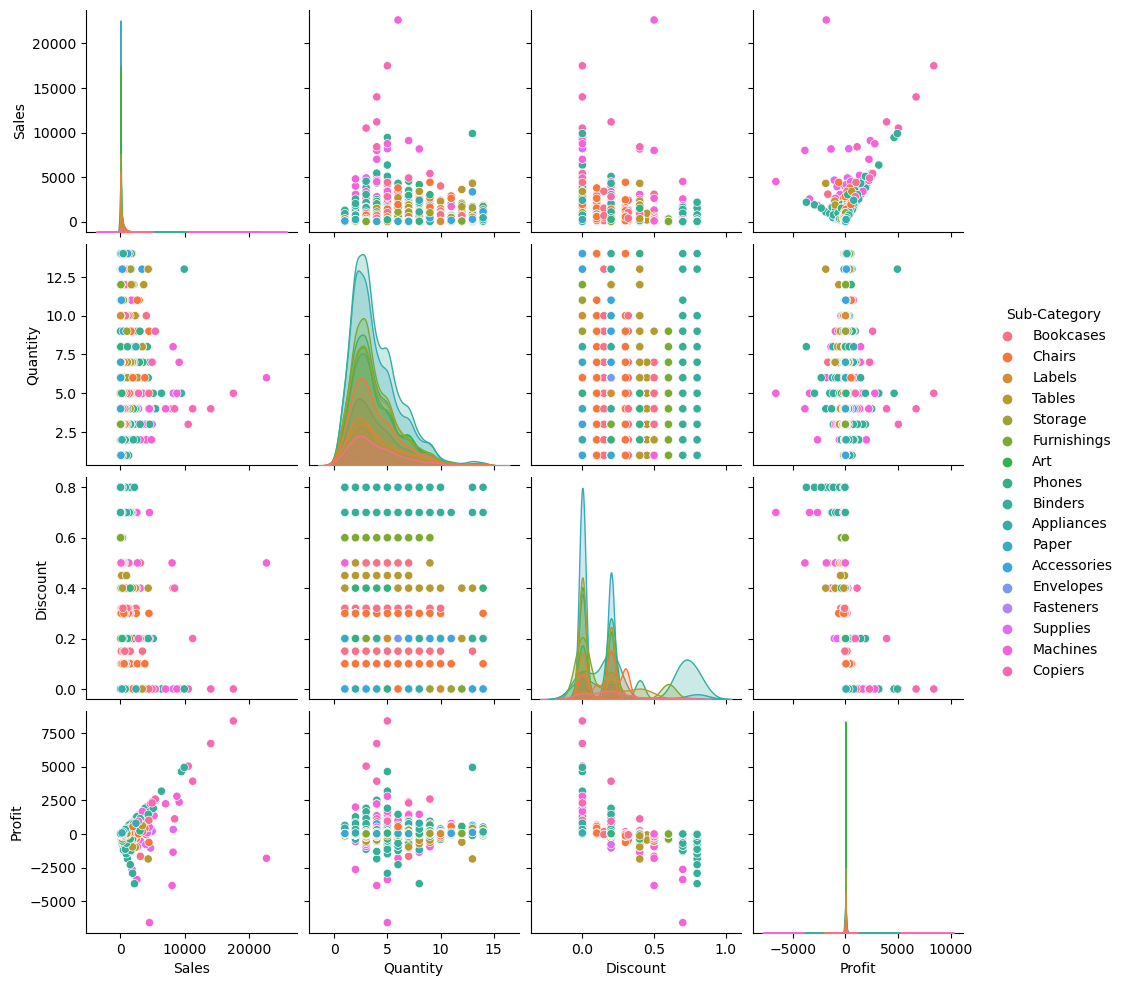

In [34]:
figsize = (15,10)
sns.pairplot(df,hue='Sub-Category')

### i. Pair Plot of Data

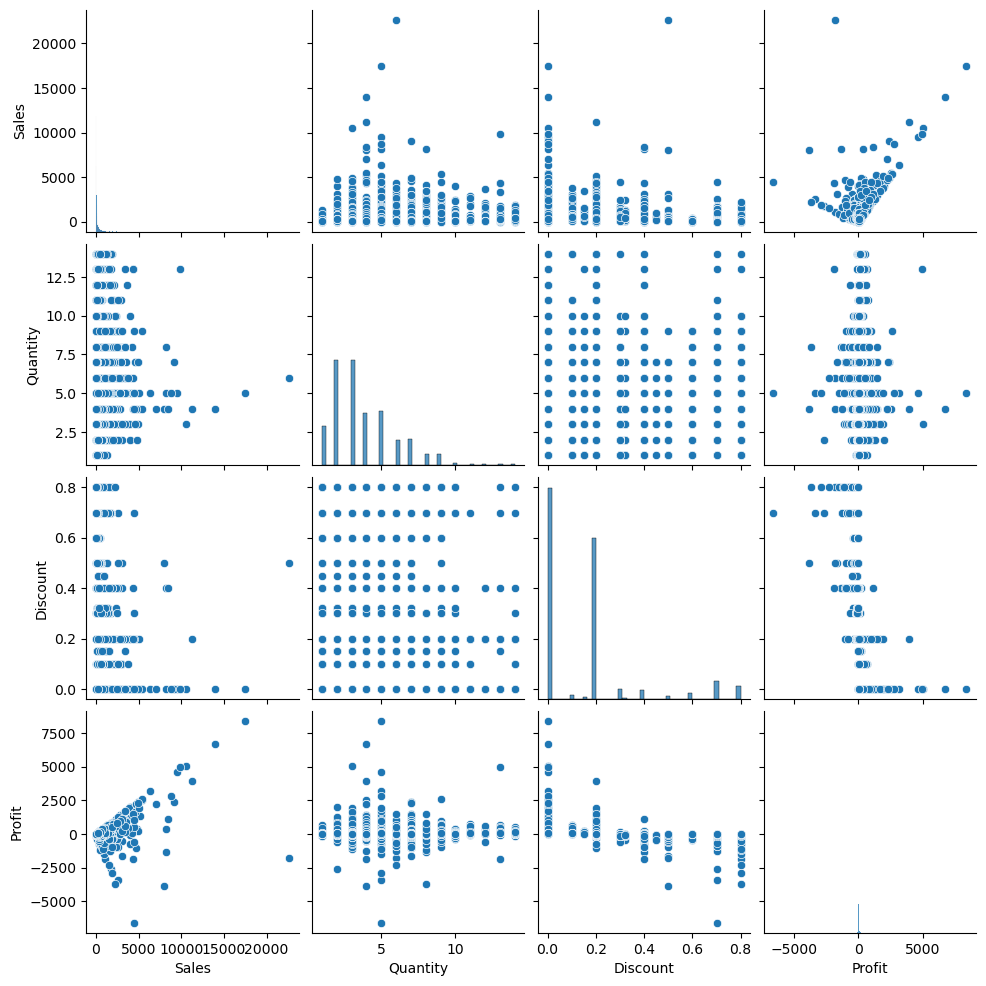

In [35]:
sns.pairplot(df)

1. As Discount increases Profit decreases
2. As Discount increases Sales decrease
3. As Sales increase Profit increases 

### j. HeatMap

C:\Users\megha\AppData\Local\Temp\ipykernel_14248\796534245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


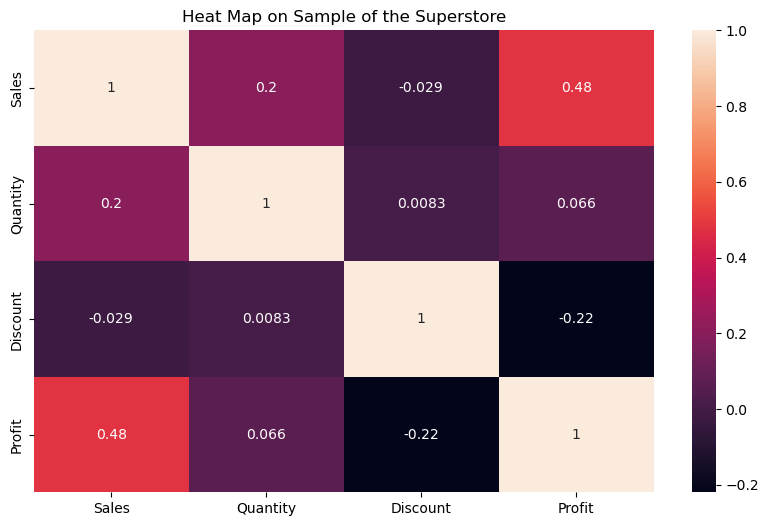

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Map on Sample of the Superstore")
plt.show()

1. Most correlation: Sales and Profit
2. Least correlation: Discount and Quantity

### k. Pair Plot Of Ship Mode

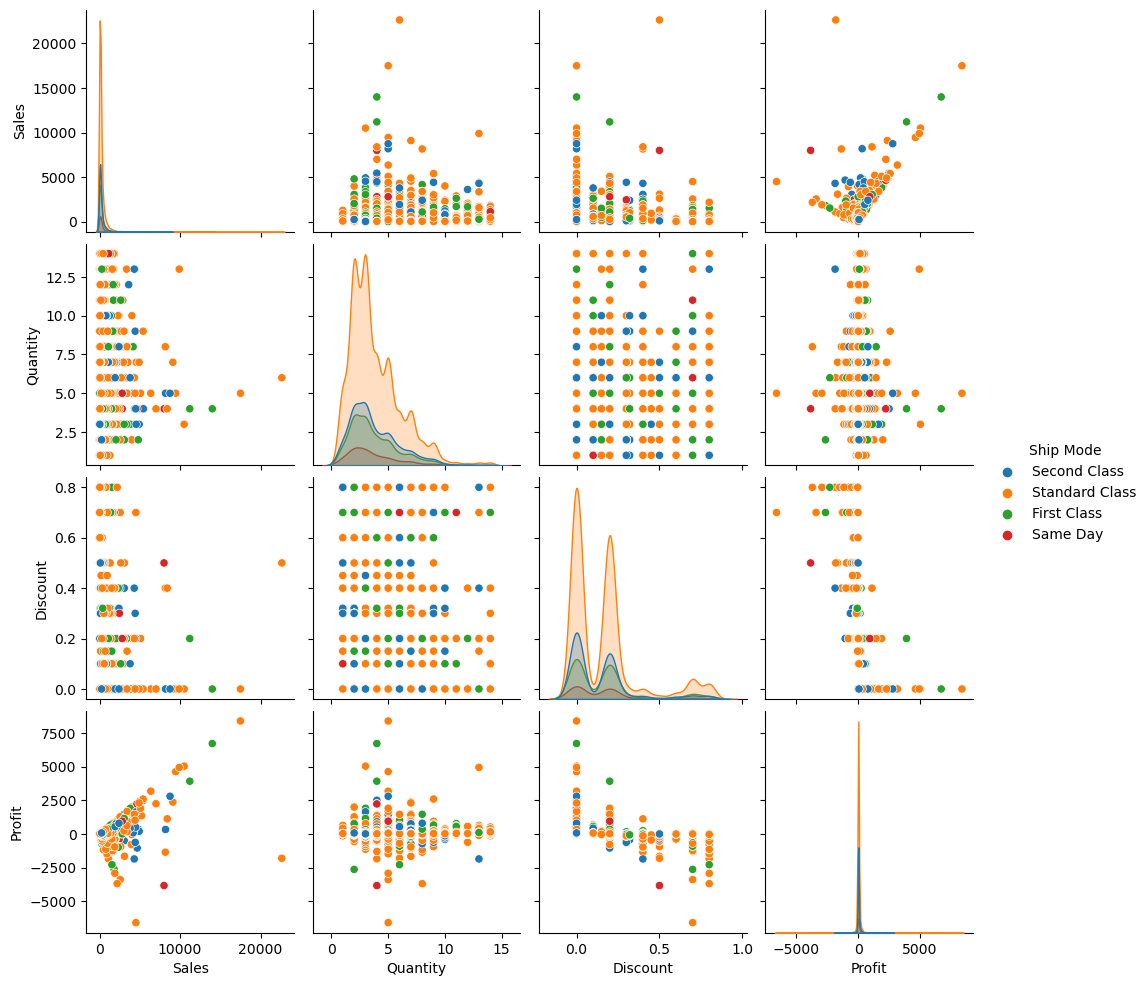

In [37]:
sns.pairplot(df, hue="Ship Mode")

In [38]:
df["Ship Mode"].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

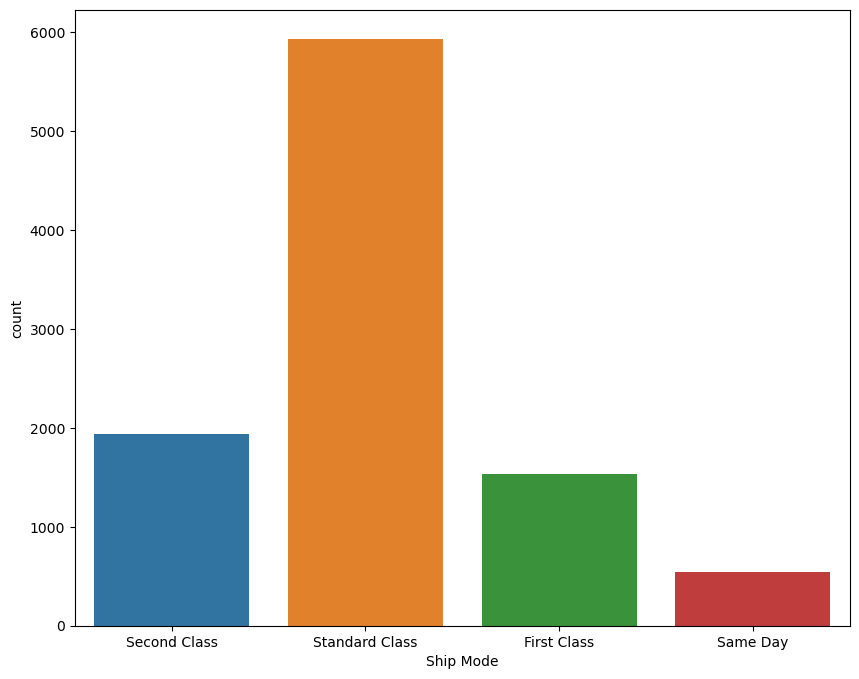

In [39]:
sns.countplot(x=df["Ship Mode"])

1. Most opted Ship Mode: Standard Class
2. Least opted Ship Mode: Same Day

### l. Pie chart of Categories

In [40]:
cat=df["Category"].value_counts()
cat

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

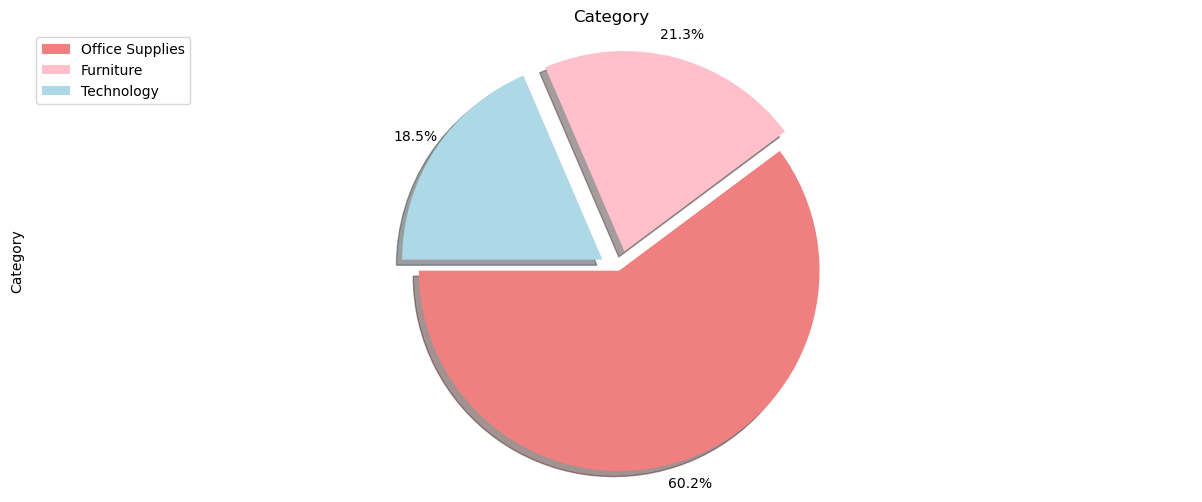

In [41]:
explode_list=[0,0.1,0.1]
colors_list=["lightcoral","pink","lightblue"]
cat.plot(kind="pie", figsize=(15,6),autopct="%1.1f%%",shadow=True, startangle=180, 
                                   explode=explode_list, labels=None, pctdistance=1.12, colors=colors_list)
plt.title("Category")
plt.axis("equal")
plt.legend(labels=cat.index,loc="upper left")
plt.show()

Major distribution of business is in Office Supplies and Least in Technology

### m. Sales vs Profit of Category

In [42]:
#Category wise Sales
cs=df.groupby("Category").Sales.sum()
#Category wise Profit
cp=df.groupby("Category").Profit.sum()

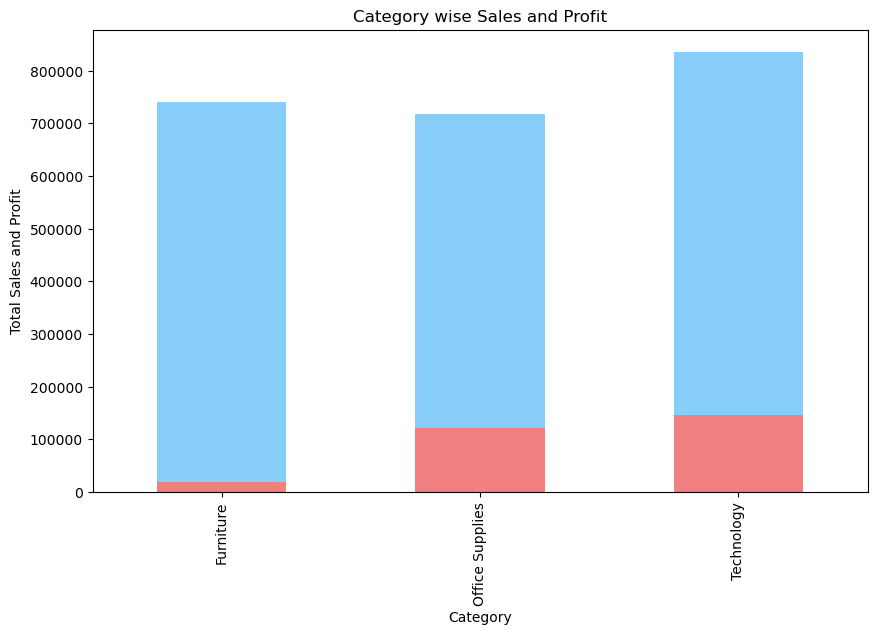

In [43]:
#Sales
ax0=cs.plot(kind="bar", figsize=(10,6), color="lightskyblue")

#Profit
ax0=cp.plot(kind="bar", figsize=(10,6), color="lightcoral")

ax0.set_title("Category wise Sales and Profit")
ax0.set_ylabel("Total Sales and Profit")

plt.show()

1. Maximum Profit and Sales in Category: Technology
2. Minimum Profit and Sales in Category: Office Supplies

### n. Category and Sub-Category

In [44]:
x=df.groupby(["Category","Sub-Category"]).Sales.sum()
y=df.groupby(["Category","Sub-Category"]).Profit.sum()

### Sales

Text(0, 0.5, 'Sales')

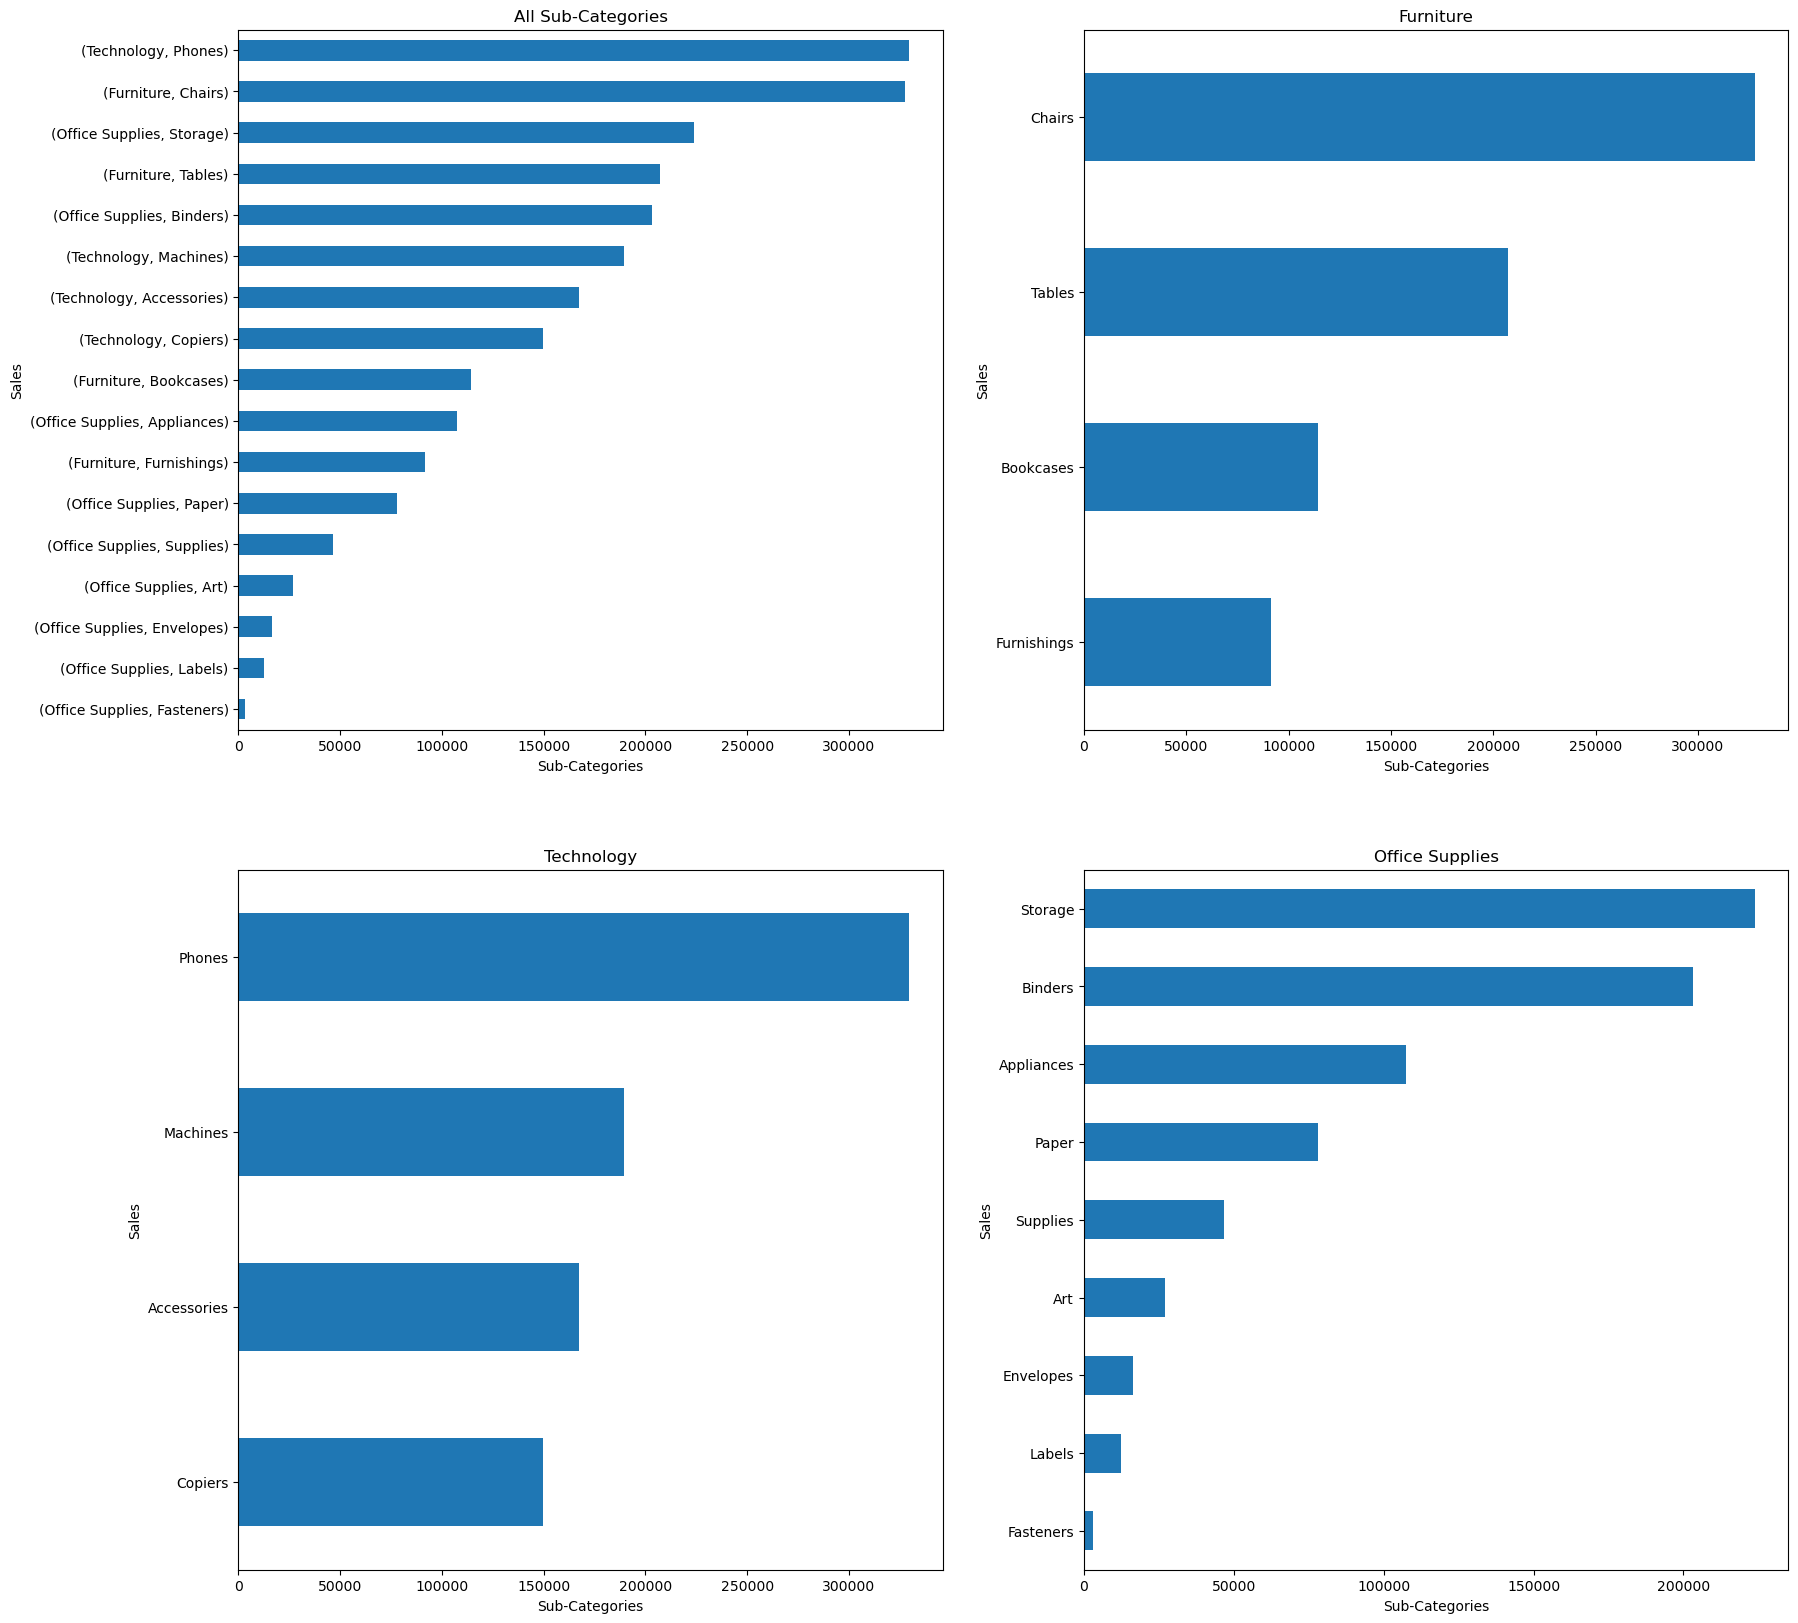

In [45]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

#Office Supplies
x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")

1. Maximum Sales in : Phones(Technology), Chairs(Furniture) and Storage(Office Supplies)
2. Minimum Sales in : Fasteners, Labels and Envelopes (Office Supplies)

### Profit

Text(0, 0.5, 'Profit')

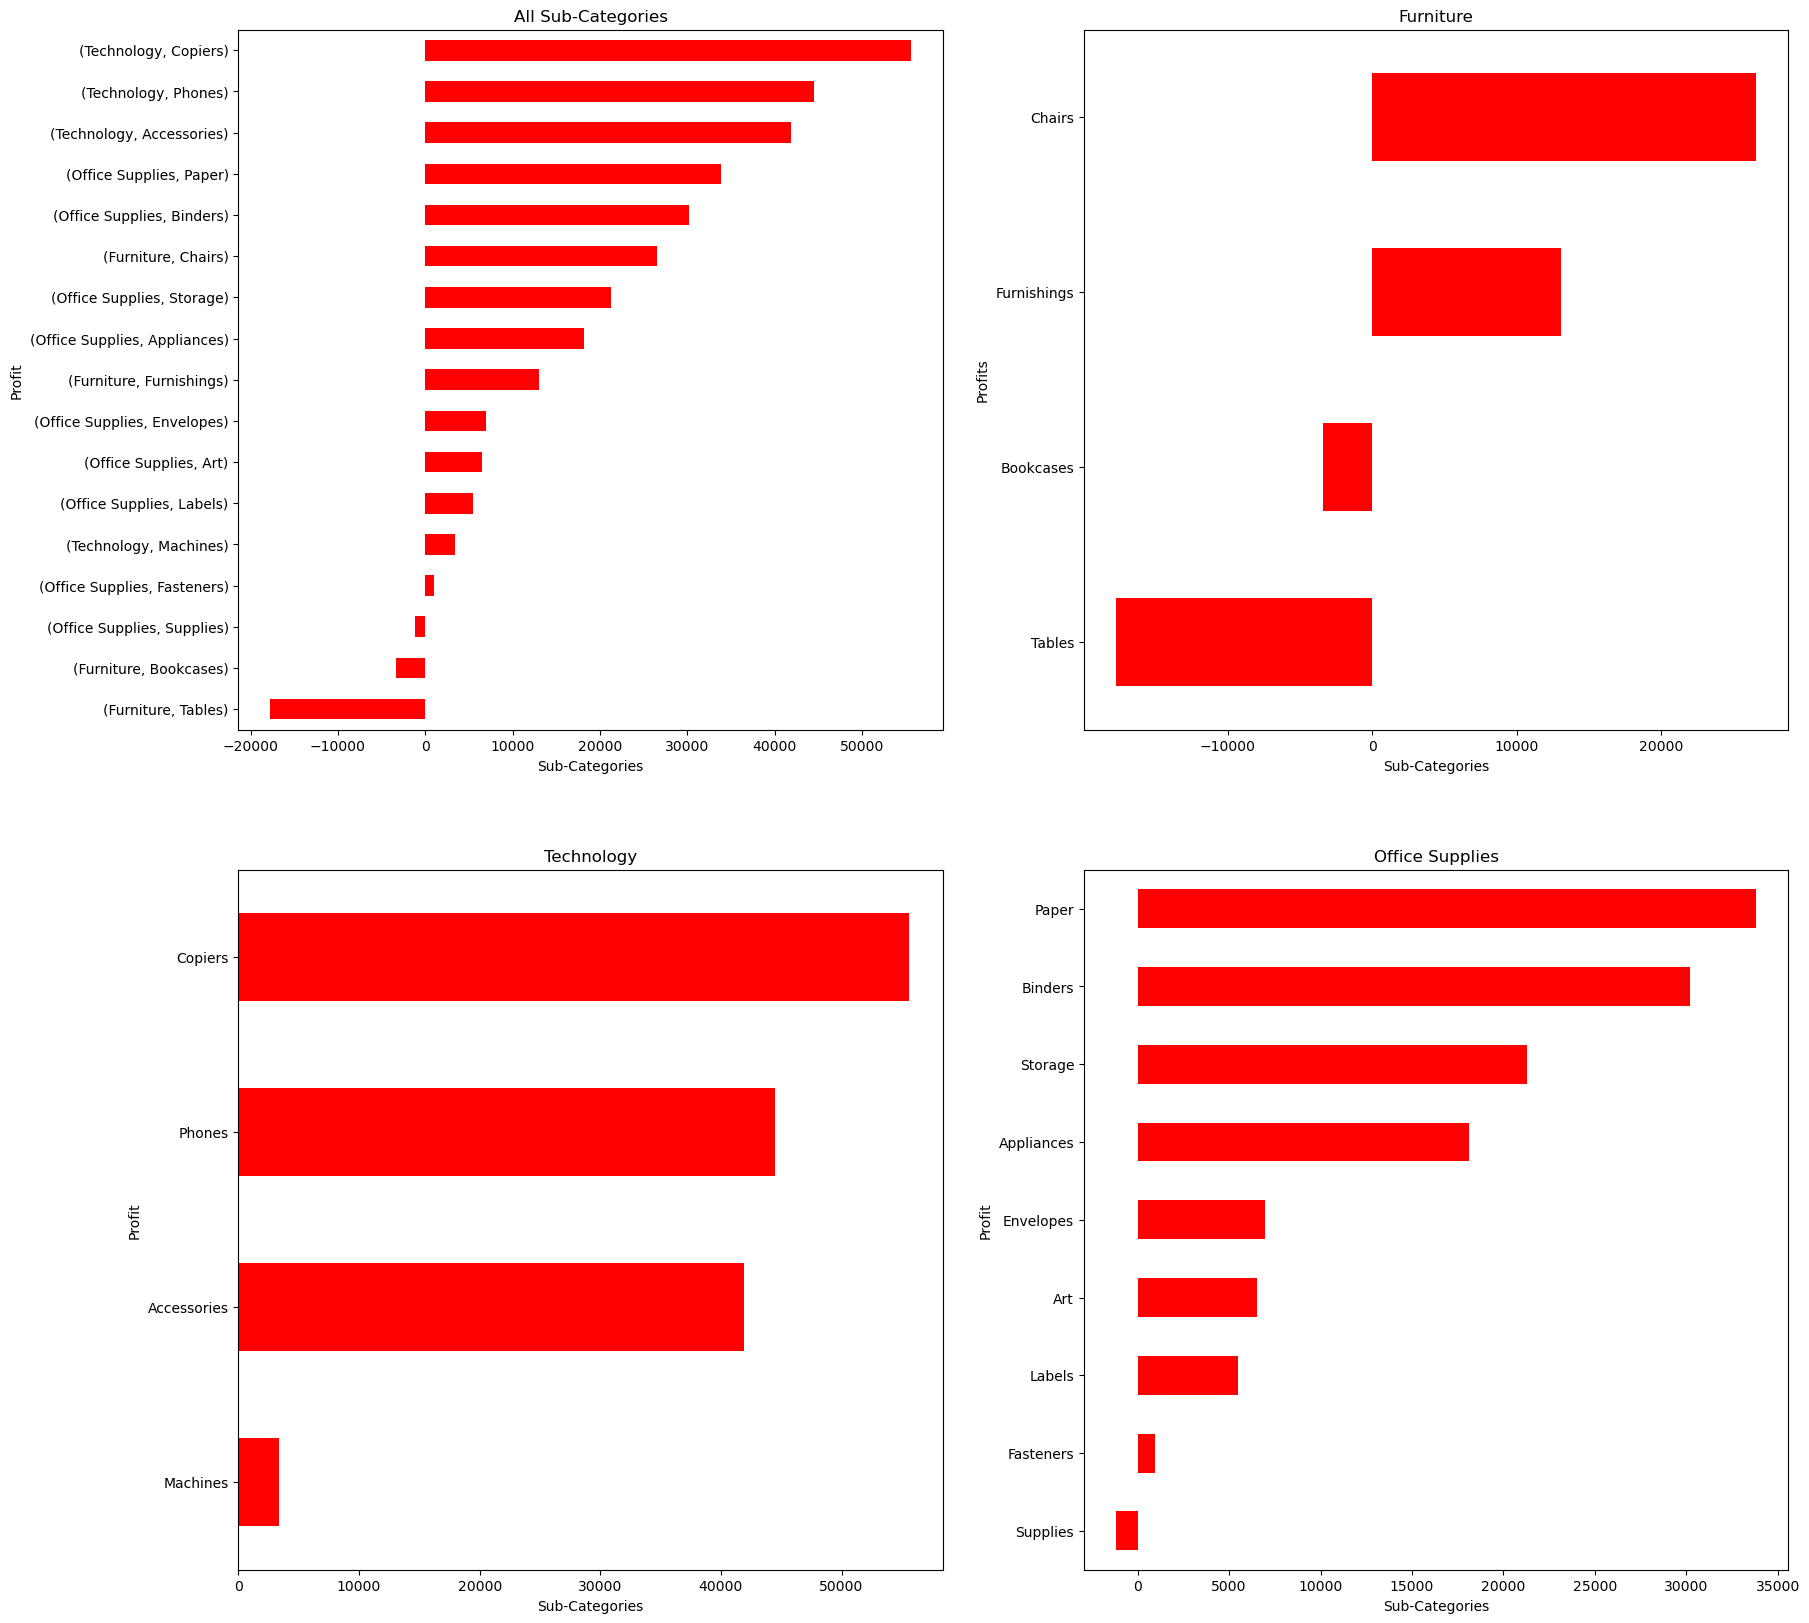

In [46]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)
#Furniture
y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color="red")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")

#Technology
y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2,color="red")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")

#Office Supplies
y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3,color="red")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")

#Total
y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0,color="red")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

1. Maximum Profit in : Copiers, Phones and Accessories (Technology)
2. Loss in : Tables and Bookcases (Furniture) and Supplies (Office Supplies)

### Sales and Profit Combined

Text(0, 0.5, 'Profit')

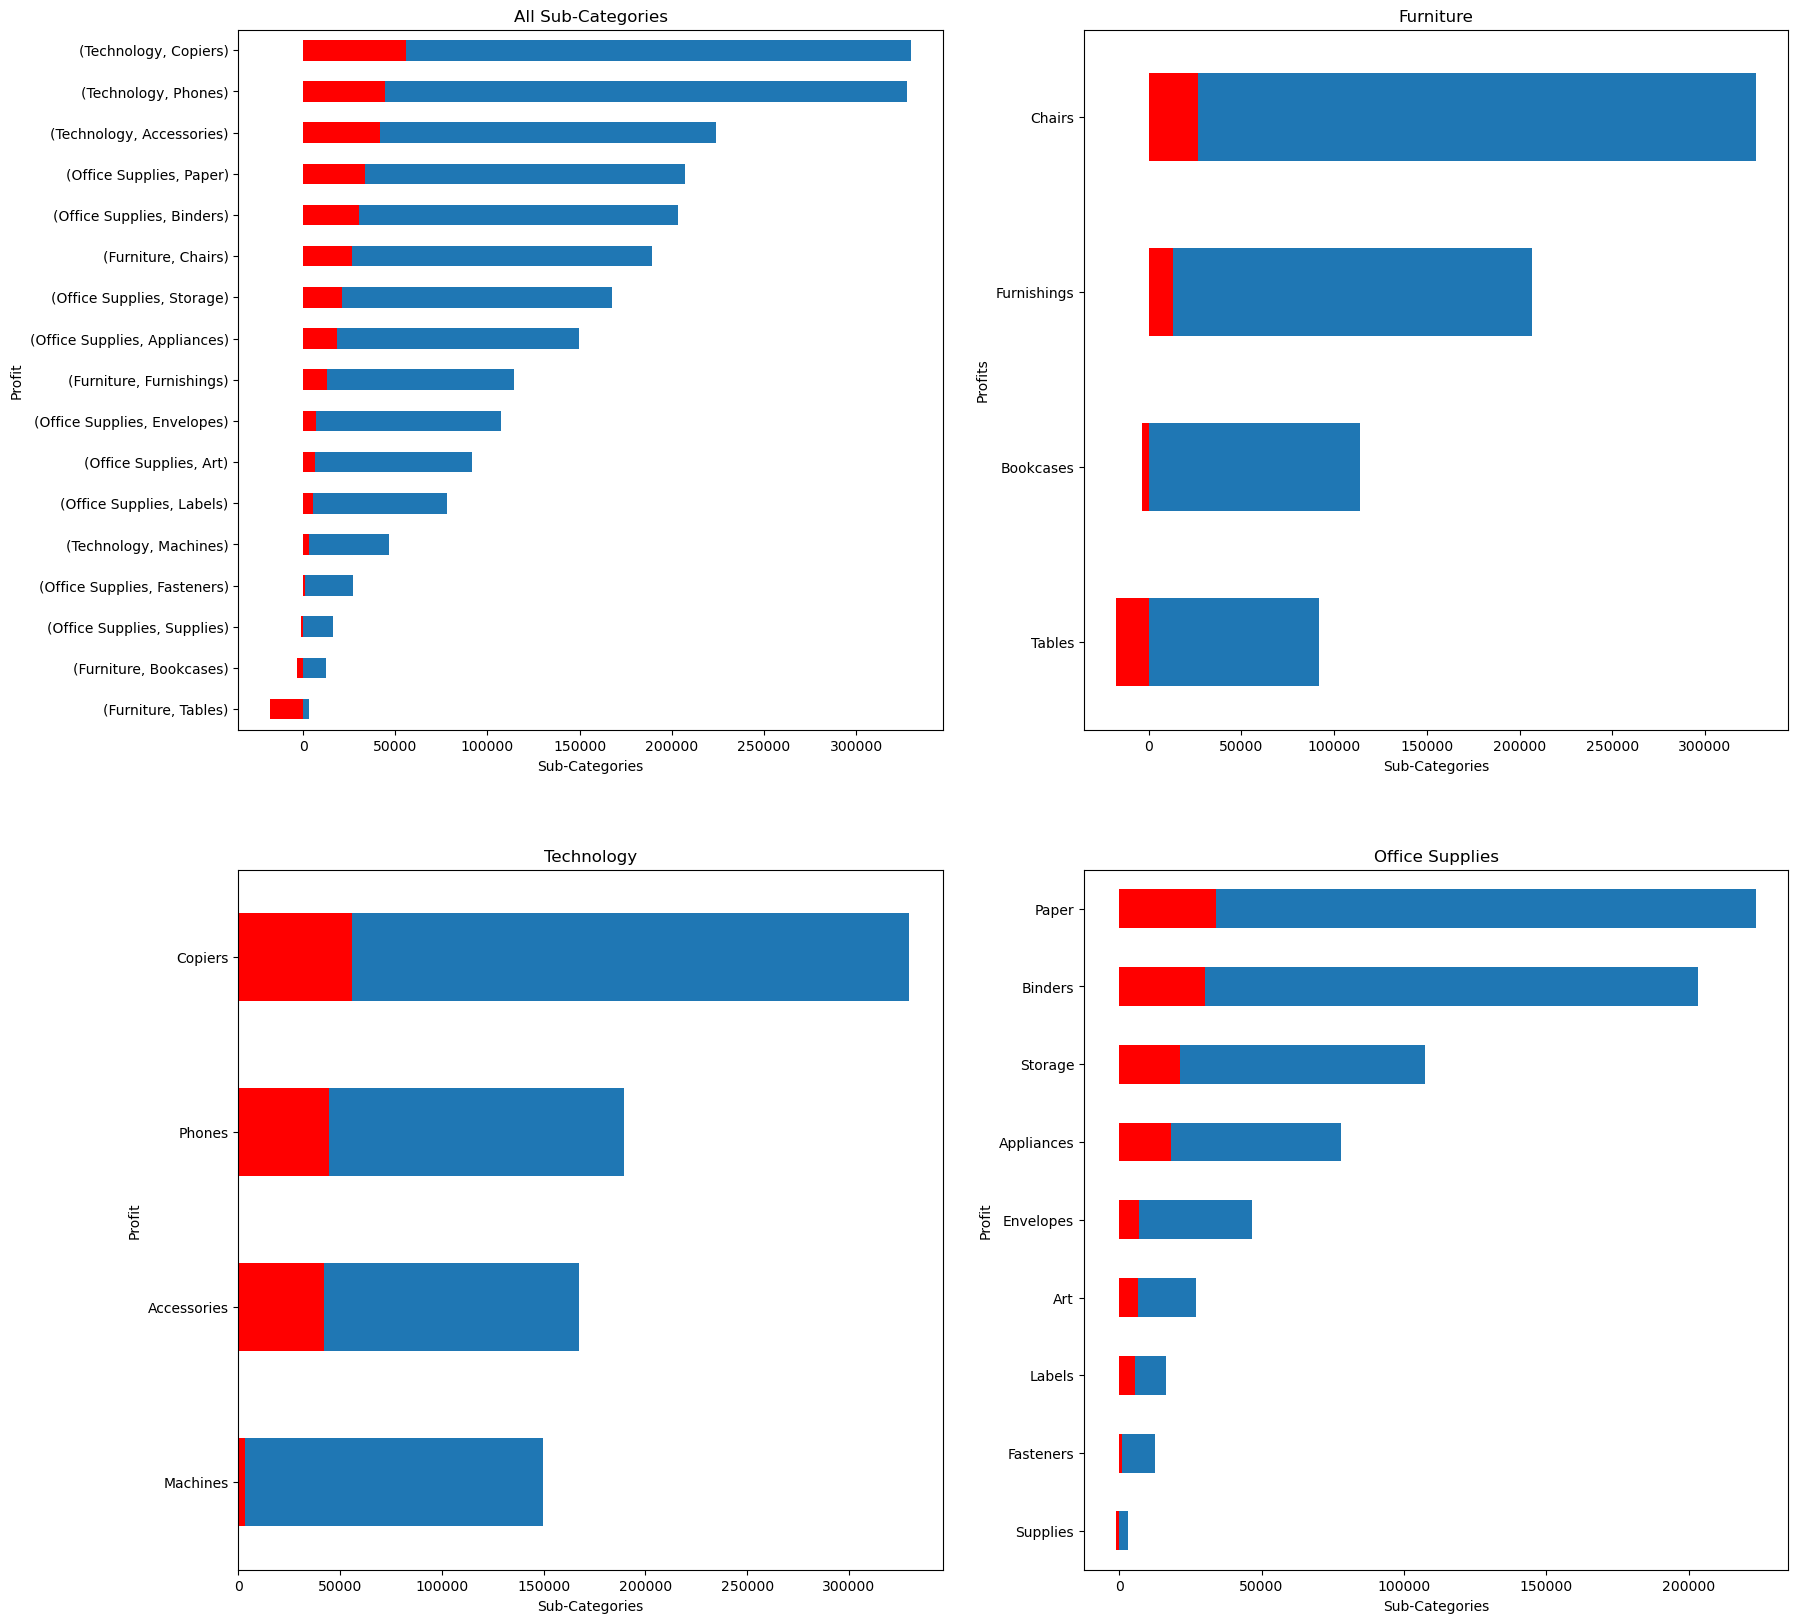

In [47]:
#Sales

fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

#Office Supplies
x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")

#Profit

#Furniture
y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color="red")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")

#Technology
y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2,color="red")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")

#Office Supplies
y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3,color="red")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")

#Total
y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0,color="red")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

1. Highest Sales and Profit in : Copiers, Phones and Accessories (Technology)
2. Lowest Sales and Profit in : Tables, Bookcases (Furniture) and Supplies (Office Supplies)

### Segment

In [48]:
seg=df["Segment"].value_counts()
seg

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

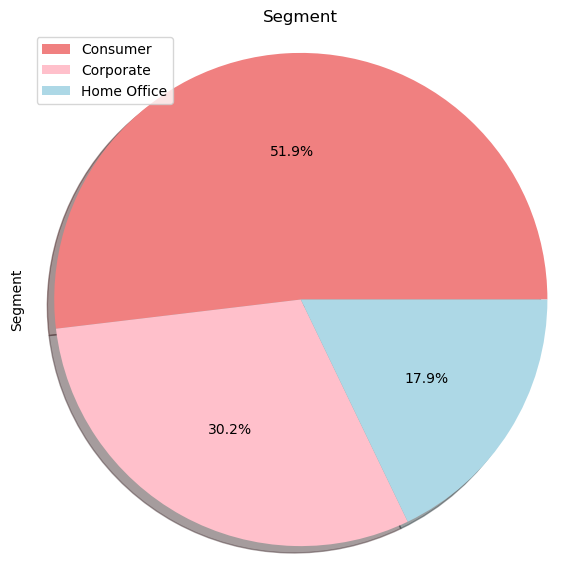

In [49]:
seg.plot(kind="pie",figsize=(7,7),autopct="%1.1f%%",
         shadow=True,labels=None,colors=["lightcoral","pink","lightblue"])
plt.title("Segment")
plt.legend(labels=seg.index,loc="upper left")
plt.axis("equal")
plt.show()

Major business distribution in Consumer Segment and Least in Home Office

### o. Sales and Profit in different segments

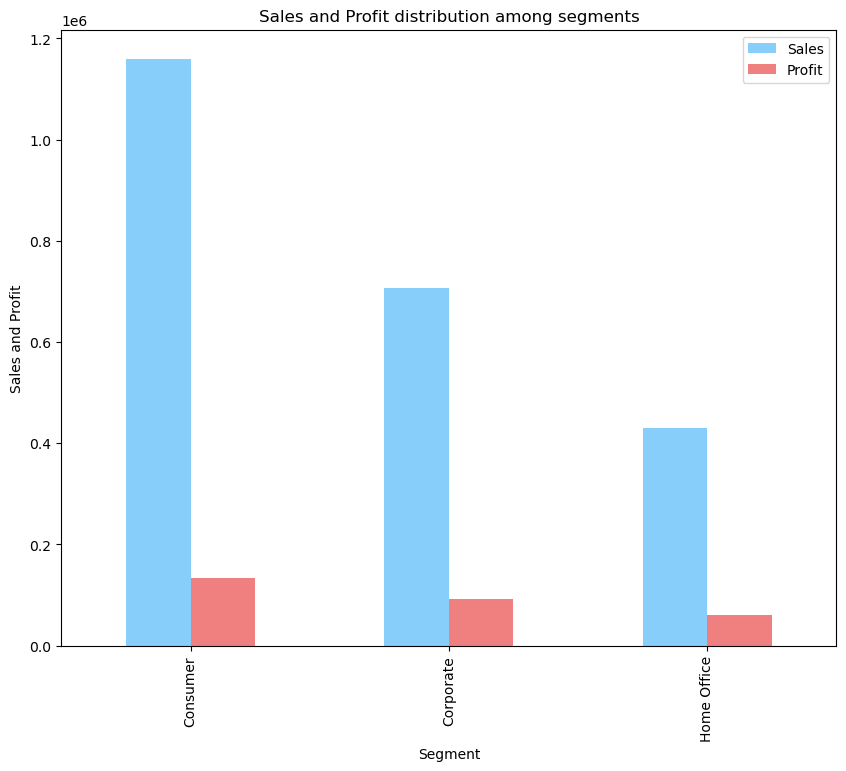

In [50]:
df.groupby("Segment")[["Sales","Profit"]].sum().plot(kind="bar",color=["lightskyblue","lightcoral"])
plt.ylabel("Sales and Profit")
plt.xlabel("Segment")
plt.title("Sales and Profit distribution among segments")
plt.show()

Most Profit and Sales in Consumer segment and least in Home Office

### p. Region

In [51]:
reg=df["Region"].value_counts()
reg

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

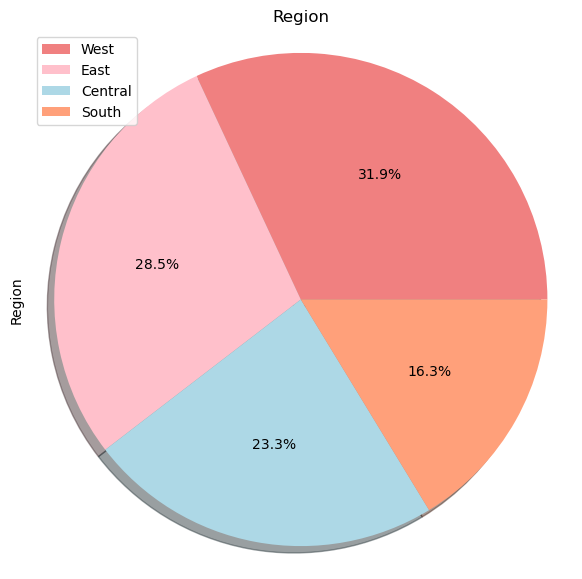

In [52]:
reg.plot(kind="pie",figsize=(7,7),autopct="%1.1f%%",
         shadow=True,labels=None, colors=["lightcoral","pink","lightblue","lightsalmon"])
plt.title("Region")
plt.legend(labels=reg.index,loc="upper left")
plt.axis("equal")
plt.show()

Company deals majorly in Western Region and least in Southern Region

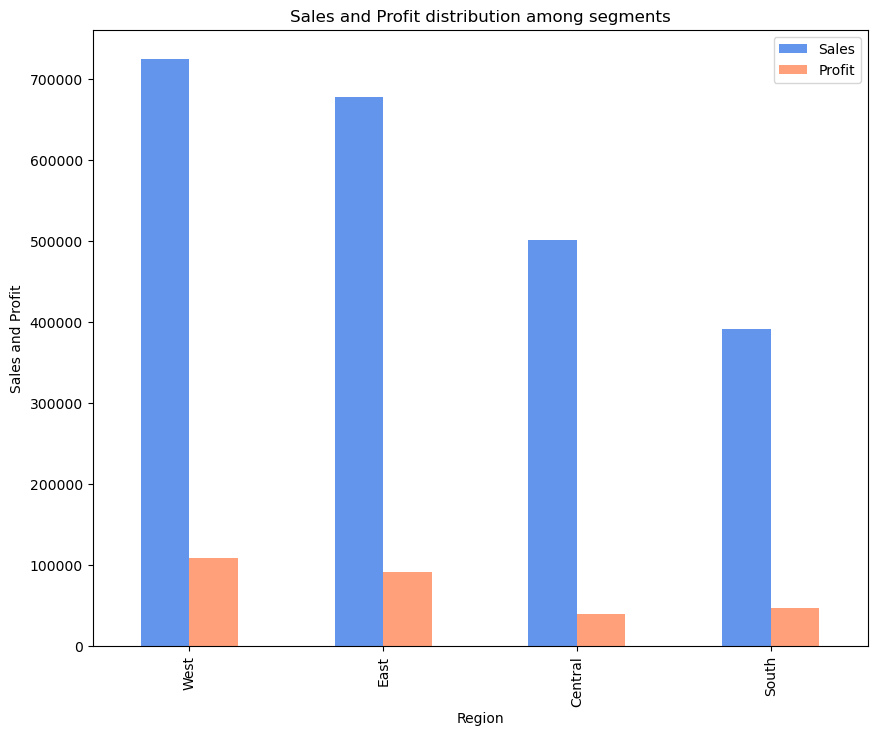

In [53]:
df.groupby("Region")[["Sales","Profit"]].sum().sort_values(by=["Sales","Profit"],ascending=False).plot(kind="bar",color=["cornflowerblue","lightsalmon"])
plt.ylabel("Sales and Profit")
plt.xlabel("Region")
plt.title("Sales and Profit distribution among segments")
plt.show()

More Profit from Western and Eastern Regions whereas lesser profits from Central and Southern regions

### q. Region wise Ship Mode

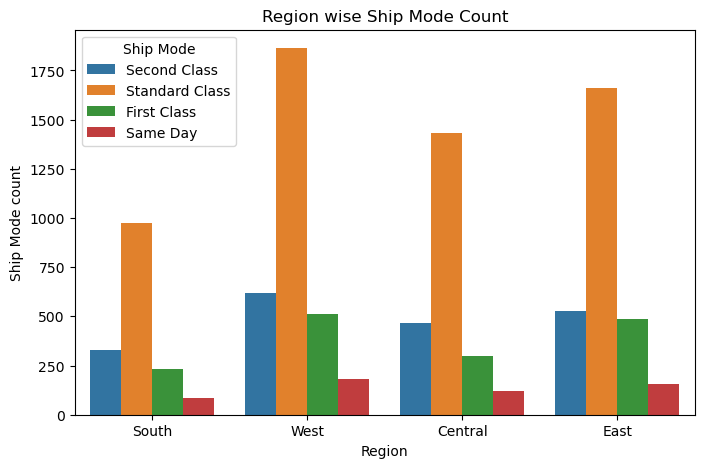

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x="Region", hue="Ship Mode", data=df)
plt.title("Region wise Ship Mode Count")
plt.ylabel("Ship Mode count")
plt.show()

1. Most opted mode : Standard Class and
2. Least opted mode: Same Day

## Observations

1.As Discount increases Profit decreases <br>
  As Discount increases Sales decrease <br>
  As Sales increase Profit increases 
  
2.Most correlation: Sales and Profit <br>
  Least correlation: Discount and Quantity
  
3.Most opted Ship Mode: Standard Class <br>
  Least opted Ship Mode: Same Day
  
4.Maximum Profit and Sales : Standard Class <br>
  Minimum Profit and Sales : Same Day
  
5.Major distribution of business is in Office Supplies and Least in Technology

6.Maximum Profit and Sales in Category: Technology <br>
  Minimum Profit and Sales in Category: Office Supplies

7.Major distribution of business is in Binders, Paper and Furnishings <br>
  Least distribution of business is in Copiers, Machines and Supplies

8.Highest Sales and Profit in : Copiers, Phones and Accessories (Technology) <br>
  Lowest Sales and Profit in : Tables, Bookcases (Furniture) and Supplies (Office Supplies)

9.Most buyers belong to "California", "New York" and "Texas" <br>
  Least buyers belong to "Wyoming", "West Virginia" and "North Dakota"

10.Maximum Sales and Profit in cities: "California" and "New York" <br>
   Minimum Sales and Profit in cities: "Oregon", "Florida" , "Arizona", "Tennessee", "Colorado",       "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas" 
   
11.Major business distribution in Consumer Segment and Least in Home Office <br>
   Most Profit and Sales in Consumer segment and least in Home Office

13.Company deals majorly in Western Region and least in Southern Region <br>
   More Profit from Western and Eastern Regions whereas lesser profits from Central and Southern        regions.
   
14.Profit and Discount have negative relation,i.e, when one increases the other decreases 


## Conclusion

1. Cut on discounts to increase Profit and Sales
2. Focus on Standard Class more as it brings most profit and sales
3. Move the major distribution of business towards Technology(most profitable) rather than Office Supplies(least profitable)
4. Under Technology more focus should be given over Copiers, Phones and Accessories which bring maximum profit
5. Work to uplift sales in cities that are facing losses such as "Oregon", "Florida" , "Arizona", "Tennessee", "Colorado", "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas" 
6. Keep focus over the cities with most buyers and most sales and profit, that are, "California" and "New york"
7. Consumer segment should be encouraged as it brings most sales and profit
8. Western and Eastern regions should be focussed upon for major chunk of sales and profit